# Exploratory Data Analysis on Telco Customer Churn Dataset
Filzahanti Nuha Ramadhani

- The dataset is from <a href='https://www.kaggle.com/datasets/blastchar/telco-customer-churn'>Telco Customer Churn Dataset</a>. 
- There are 21 columns: customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod,  MonthlyCharges, TotalCharges, and Churn.
- The purpose of this project is to extract insights from Telco Customer Churn Dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

## Data Preparation

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Remove white spaces in column 'TotalCharges' and transform its type to float

In [3]:
df=df.loc[~df['TotalCharges'].str.contains(' ')]
df['TotalCharges']=df['TotalCharges'].astype(float)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


#### Find the missing values

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no missing values.

#### Find duplicated rows

In [6]:
df.duplicated().sum()

0

There are no duplicated rows.

## Exploratory Data Analysis

### Calculate Summary Statistics
Use df.describe() to get the summary statistics for numerical data

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Observations:
1. The mean and the 50% (median) of all columns are not close, indicate the distributions are asymmetrical.
2. The 50% (median) of TotalCharges is lower than its mean, indicates the distribution is likely to be right skewed.
3. SeniorCitizen is a boolean, no need to conclude its symmetricity.
4. The maximum and minimum of MonthlyCharges, TotalCharges, tenure, and SeniorCitizen make sense.
5. There are large differences between 75% and max in TotalCharges, indicates there are potential outliers or the data is skewed to the right.

Summary statistics for all columns in df

In [8]:
df.astype('object').describe().transpose()

,count,unique,top,freq
customerID,7032,7032,7590-VHVEG,1
gender,7032,2,Male,3549
SeniorCitizen,7032,2,0,5890
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
tenure,7032,72,1,613
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497


Observations:
1. SeniorCitizen has 2 unique values, 1 and 0. 
2. Partner, Dependents, PhoneService, PaperlessBilling, and Churn have 2 unique values, Yes and No.
3. Most customers have phone services and most of them are not senior citizens.

### Univariate Analysis

#### Detect outliers with Boxplots
Create boxplots to detect outliers in numerical data.

In [9]:
#find the numeric columns
num = df.select_dtypes([np.number])
num

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


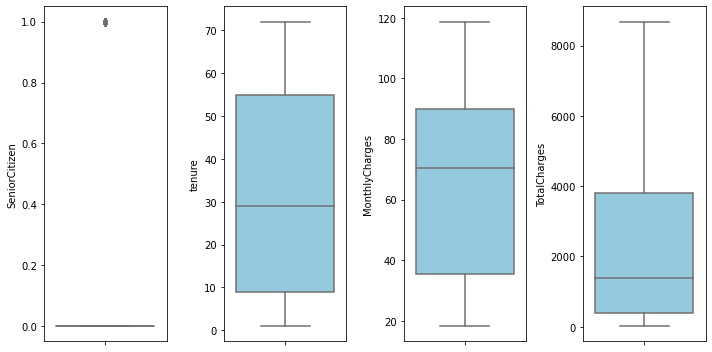

In [10]:
#adjust the figure size
plt.figure(figsize=(10,5))
#plot teh data
numericals = num.columns
for i in range(0,len(numericals)):
    plt.subplot(1, len(numericals), i+1)
    sns.boxplot(y=df[numericals[i]], color='skyblue')
    plt.tight_layout()

Observations:
1. SeniorCitizen only has two unique values, 1 and 0. Most customers are not senior citizens.
2. There are no outliers in the other numerical data.
3. The median of TotalCharges is closer to the bottom of the box, indicates the distribution is right skewed.

#### KDE Plot

C:\Users\Filzahanti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Filzahanti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Filzahanti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

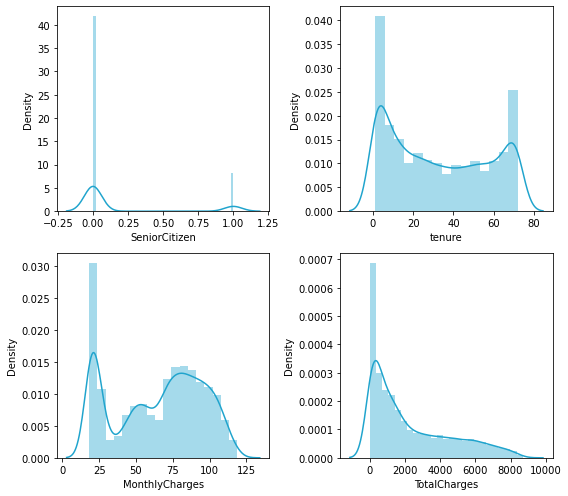

In [11]:
#adjust the figure size
plt.figure(figsize=(8,7))
#plot the data
numericals = num.columns
for i in range(0,len(numericals)):
    plt.subplot(2, len(numericals)//2, i+1)
    sns.distplot(x=df[numericals[i]], color='#20A4CD')
    plt.xlabel(numericals[i])
    plt.tight_layout()

Observations:
1. The tenure distribution appears to be a bimodal distribution. The main peak is at around 1 and the lower peak is at around 70. 
2.  The monthly charges distribution is a trimodal distribution. The main peak is at around 18, the second peak is at around 80, and the third peak is at around 51.
3. The total charges distribution is right skewed.
4. Senior citizen has 2 unique values, 1 and 0.

#### Value Counts for Categorical Data

<b>Churn</b>

C:\Users\Filzahanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


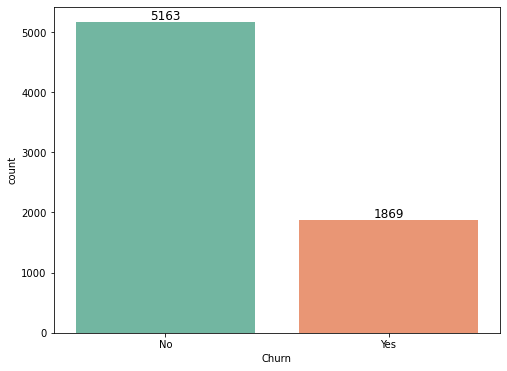

In [12]:
#Adjust the figure size
plt.figure(figsize=(8,6))
ax = sns.countplot(df['Churn'], palette='Set2')
for i in ax.containers:
    ax.bar_label(i, fontsize=12)

Observation:
- Churn has more observations in one of the classes, 'No'. The data is imbalanced but not severe.

<b>Contract</b>

C:\Users\Filzahanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


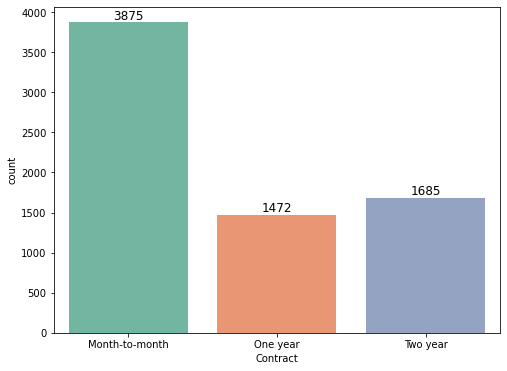

In [13]:
#Adjust the figure size
plt.figure(figsize=(8,6))
ax = sns.countplot(df['Contract'], palette='Set2')
for i in ax.containers:
    ax.bar_label(i, fontsize=12)

Observation:
- Month-to-month is the contract type most customers signed followed by two year contract and one year contract.

<b>Dependents and Partner</b>

C:\Users\Filzahanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Filzahanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


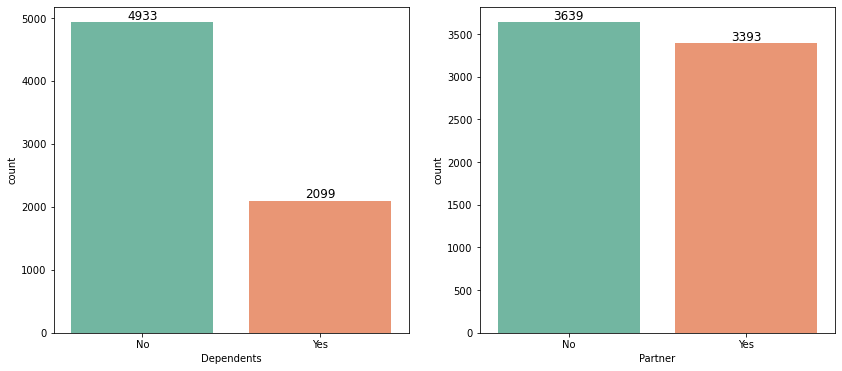

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))
ax0 = sns.countplot(df['Dependents'], palette='Set2',
                  order=df['Dependents'].value_counts().index, ax=ax[0])
ax1 = sns.countplot(df['Partner'], palette='Set2',
                  order=df['Partner'].value_counts().index, ax=ax[1])
for j in (ax0, ax1):
    for i in j.containers:
        j.bar_label(i, fontsize=12)

Observations:
1. More than two thirds of the customers don't have dependents.
2. Customers with and without partners are almost equal.

<b>Payment Method and Paperless Billing</b>

C:\Users\Filzahanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Filzahanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


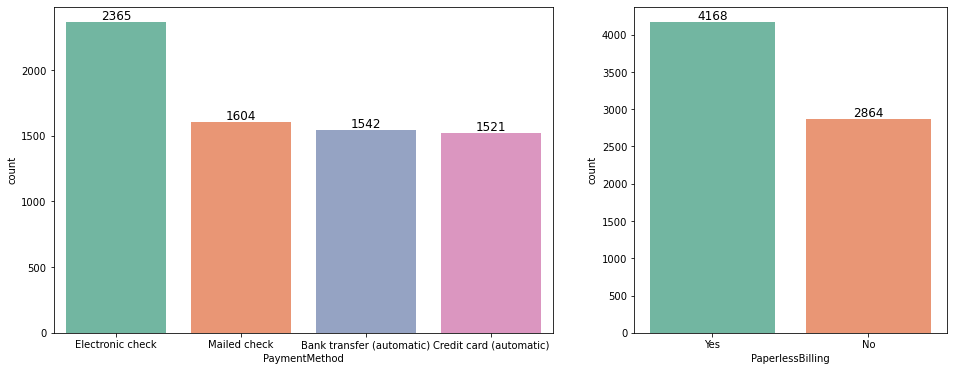

In [15]:
fig, ax = plt.subplots(1, 2, gridspec_kw=dict(width_ratios=[1.6, 1]), figsize=(16,6))
ax0 = sns.countplot(df['PaymentMethod'], palette='Set2',
                  order=df['PaymentMethod'].value_counts().index, ax=ax[0])
ax1 = sns.countplot(df['PaperlessBilling'], palette='Set2',
                  order=df['PaperlessBilling'].value_counts().index, ax=ax[1])
for j in (ax0, ax1):
    for i in j.containers:
        j.bar_label(i, fontsize=12)

Observations:
1. Most customers use electronic check as their payment method. 
2. The number of customers who use mailed check, bank transfer, and credit card are almost equal.

<b>Phone Service, Multiple Lines, and Internet Service<b>

C:\Users\Filzahanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Filzahanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Filzahanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


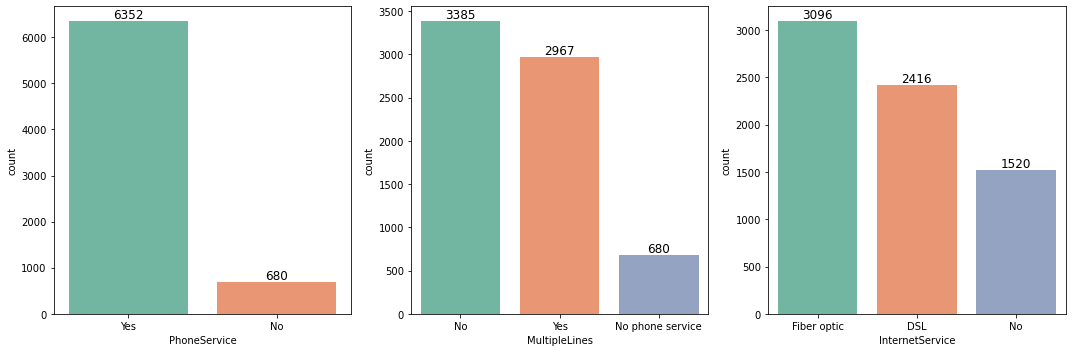

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
ax0 = sns.countplot(df['PhoneService'], palette='Set2',
                  order=df['PhoneService'].value_counts().index, ax=ax[0])
ax1 = sns.countplot(df['MultipleLines'], palette='Set2',
                  order=df['MultipleLines'].value_counts().index, ax=ax[1])
ax2 = sns.countplot(df['InternetService'], palette='Set2',
                  order=df['InternetService'].value_counts().index, ax=ax[2])
for j in (ax0, ax1, ax2):
    for i in j.containers:
        j.bar_label(i, fontsize=12)
plt.tight_layout()

Observations:
1. The majority of the customers use phone service.
2. Several of the customers don't have multiple lines and some of them use it.
3. Fiber Optic is the most used internet service.

<b>Streaming TV and Streaming Movies</b>

C:\Users\Filzahanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Filzahanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


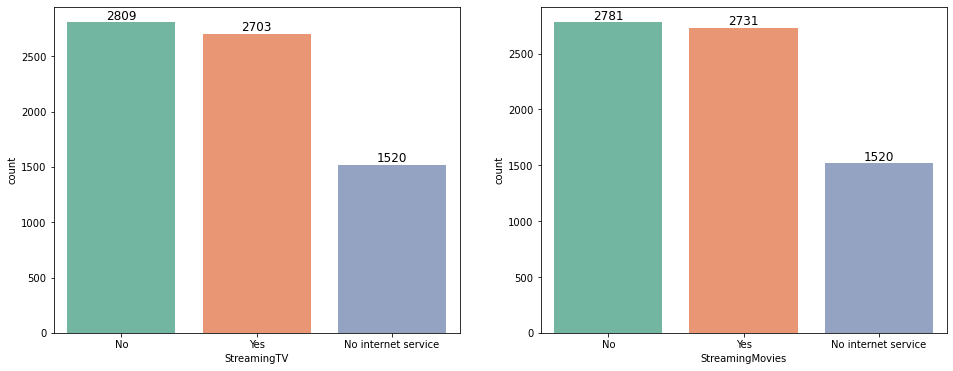

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
ax0 = sns.countplot(df['StreamingTV'], palette='Set2',
                  order=df['StreamingTV'].value_counts().index, ax=ax[0])
ax1 = sns.countplot(df['StreamingMovies'], palette='Set2',
                  order=df['StreamingMovies'].value_counts().index, ax=ax[1])
for j in (ax0, ax1):
    for i in j.containers:
        j.bar_label(i, fontsize=12)

Observation:
- Customers who use streaming TV service and who don't use it are nearly equal in number, this also applies to streaming movies.

<b>Online Security, Online Backup, Device Protection, and Tech Support</b>

C:\Users\Filzahanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Filzahanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Filzahanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Filzaha

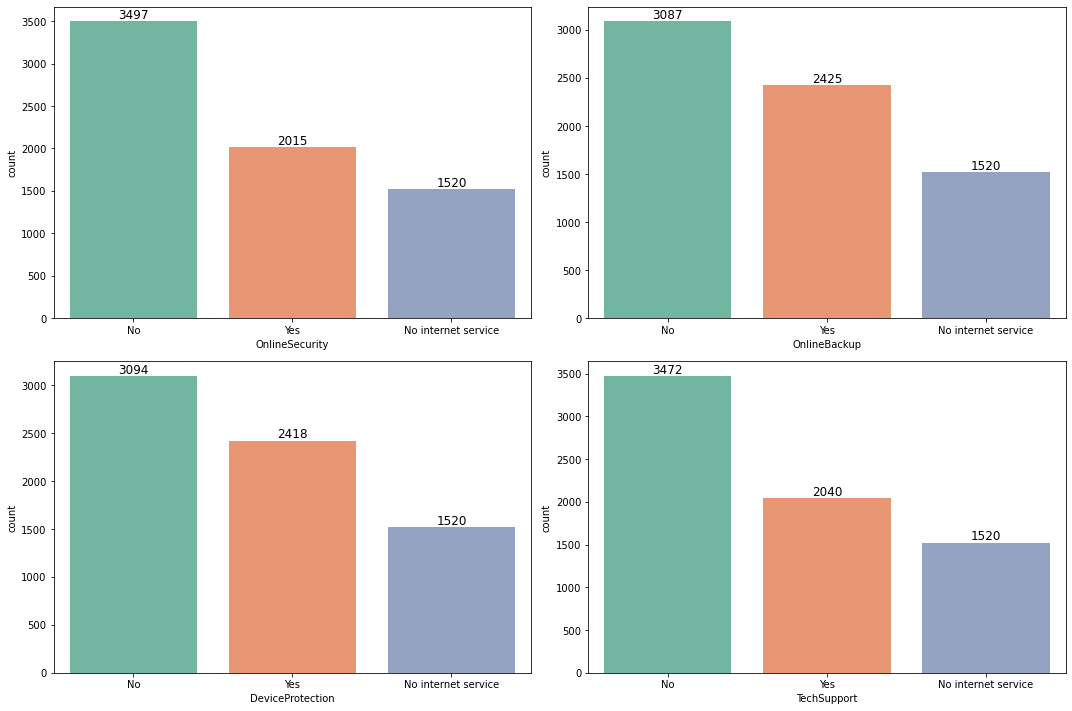

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))
ax0 = sns.countplot(df['OnlineSecurity'], palette='Set2',
                  order=df['OnlineSecurity'].value_counts().index, ax=ax[0,0])
ax1 = sns.countplot(df['OnlineBackup'], palette='Set2',
                  order=df['OnlineBackup'].value_counts().index, ax=ax[0,1])
ax2 = sns.countplot(df['DeviceProtection'], palette='Set2',
                  order=df['DeviceProtection'].value_counts().index, ax=ax[1,0])
ax3 = sns.countplot(df['TechSupport'], palette='Set2',
                  order=df['TechSupport'].value_counts().index, ax=ax[1,1])
for j in (ax0, ax1, ax2, ax3):
    for i in j.containers:
        j.bar_label(i, fontsize=12)
plt.tight_layout()

Oservation:
- The number of customers who don't use online security, online backup, device protection, or tech support are a bit higher than the number of customers who use them.

### Multivariate Analysis

#### Correlation of Continuous Data
In this section, we will measure the strength of linear relationships between continuous data in df with Pearson Correlation as the method of correlation.

In [19]:
#Create a list of continuous data in df
continuous = ['tenure', 'MonthlyCharges', 'TotalCharges']

<AxesSubplot:>

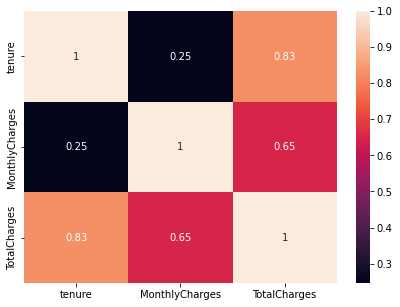

In [20]:
#Adjust the figure size
plt.figure(figsize=(7, 5))
#Plot the data
cor = df[continuous].corr(method='pearson')
sns.heatmap(cor, annot=True)

Observations:
1. Tenure and total charges have a strong and positive correlation with each other which means when one of the variables increases, the other increases or when one of the variables decreases the other decreases.
2. Monthly charges and total charges have a  positive correlation but the strength of the relationship is moderate.
3. Tenure and monthly charges have a weak relationship.

#### Pairplot of Numerical Data

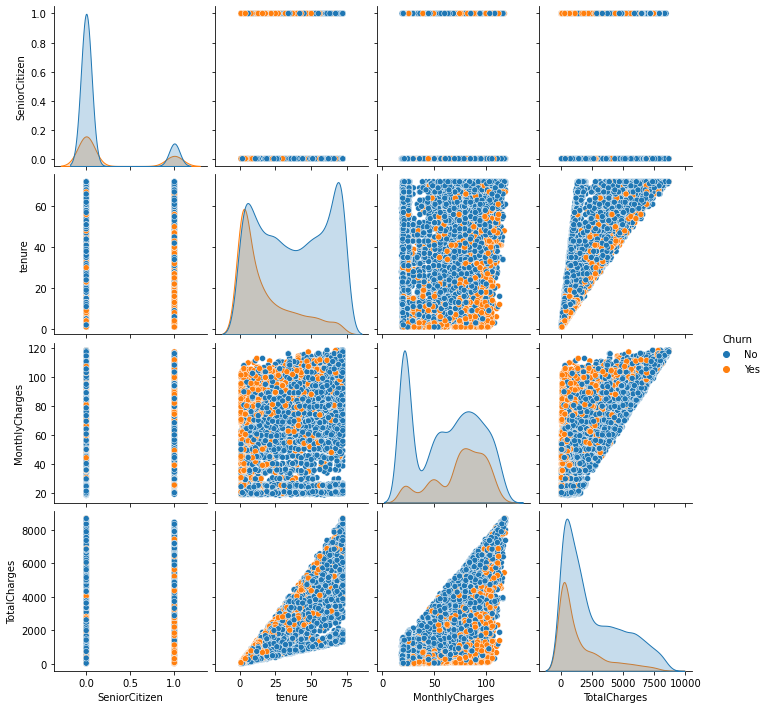

In [21]:
sns.pairplot(df, hue='Churn', palette='tab10')

Observations:
1. The tenure distribution of churned customers is right skewed, most of them had low tenures.
2. Total charges and tenures of churned customers appears to have a positive correlation.
3. Monthly charges and total charges of churned customers seems to have a positive correlation but several of them had high monthly charges and low total charges. 
4. A lot of customers who left had high monthly charges and low tenures.

#### Correlation between categorical variables and target variable.

<b>Contract</b>

C:\Users\Filzahanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


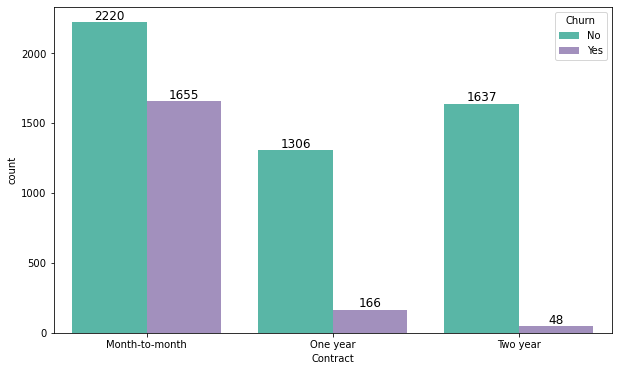

In [22]:
#Adjust the figure size
plt.figure(figsize=(10,6))
ax = sns.countplot(df['Contract'], hue=df['Churn'], palette=['#49C5B0','#A088C5'])
for i in ax.containers:
    ax.bar_label(i, fontsize=12)

Observations:
1. Most customers signed month-to-month contracts.
2. Churned customers decrease as the contract period increase. There is a huge difference between churned customers who signed month-to-month contracts and the other contracts.

<b>Dependents and Partner</b>

C:\Users\Filzahanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Filzahanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


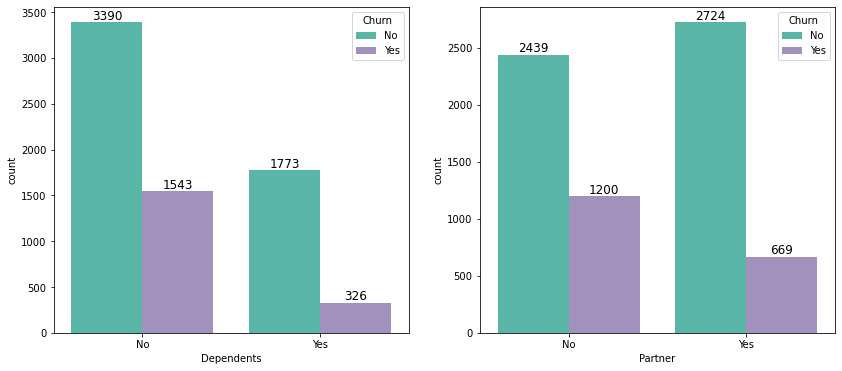

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))
ax0 = sns.countplot(df['Dependents'], hue=df['Churn'], palette=['#49C5B0','#A088C5'],
                  order=df['Dependents'].value_counts().index, ax=ax[0])
ax1 = sns.countplot(df['Partner'], hue=df['Churn'], palette=['#49C5B0','#A088C5'],
                  order=df['Partner'].value_counts().index, ax=ax[1])
for j in (ax0, ax1):
    for i in j.containers:
        j.bar_label(i, fontsize=12)

Observations:
1. Customers without dependents churned more than customers with dependents.
2. Customers without partner are more likely to churn.

<b>Payment Method and PaperlessBilling<b>

C:\Users\Filzahanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Filzahanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


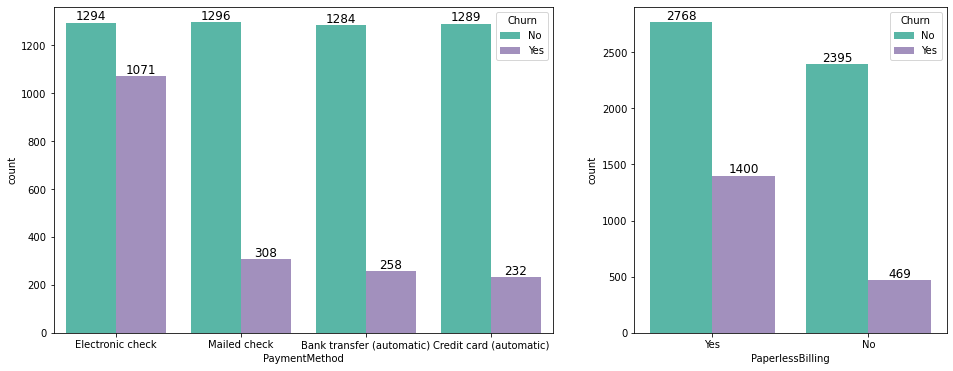

In [24]:
fig, ax = plt.subplots(1, 2, gridspec_kw=dict(width_ratios=[1.6, 1]), figsize=(16,6))
ax0 = sns.countplot(df['PaymentMethod'], hue=df['Churn'], palette=['#49C5B0','#A088C5'],
                  order=df['PaymentMethod'].value_counts().index, ax=ax[0])
ax1 = sns.countplot(df['PaperlessBilling'], hue=df['Churn'], palette=['#49C5B0','#A088C5'],
                  order=df['PaperlessBilling'].value_counts().index, ax=ax[1])
for j in (ax0, ax1):
    for i in j.containers:
        j.bar_label(i, fontsize=12)

Observations:
1. Nearly a half of customers who used electronic check as their payment method churned.
2. The number of churned customers who used electronic check is significantly higher than the other methods.
3. More than a third of customers who used paperless billing left.

<b>Phone Service, Multiple Lines, and Internet Service<b>

C:\Users\Filzahanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Filzahanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Filzahanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


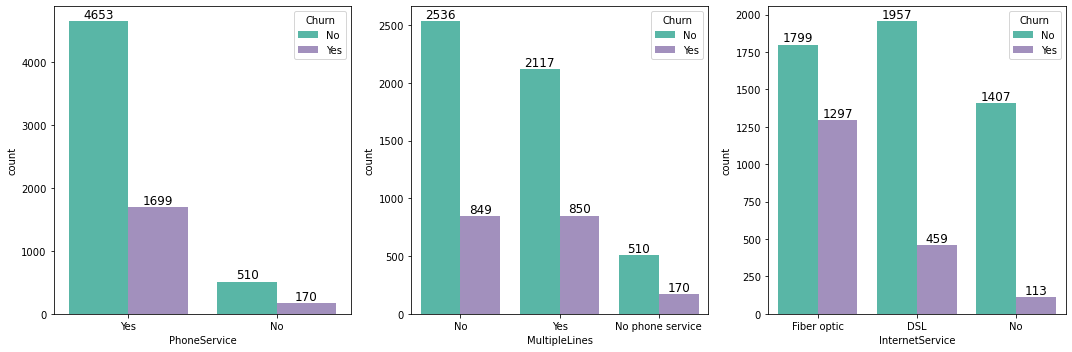

In [25]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
ax0 = sns.countplot(df['PhoneService'], hue=df['Churn'], palette=['#49C5B0','#A088C5'],
                  order=df['PhoneService'].value_counts().index, ax=ax[0])
ax1 = sns.countplot(df['MultipleLines'], hue=df['Churn'], palette=['#49C5B0','#A088C5'],
                  order=df['MultipleLines'].value_counts().index, ax=ax[1])
ax2 = sns.countplot(df['InternetService'], hue=df['Churn'], palette=['#49C5B0','#A088C5'],
                  order=df['InternetService'].value_counts().index, ax=ax[2])
for j in (ax0, ax1, ax2):
    for i in j.containers:
        j.bar_label(i, fontsize=12)
plt.tight_layout()

Observations:
1. Customers who used phone service churned significantly higher than customers who didn't use it.
2. The number of churned customers who didn't use multiple lines and used it doesn't have a big difference.
3. Nearly a half of customers who used fiber optic left.

<b>Streaming TV and Streaming Movies</b>

C:\Users\Filzahanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Filzahanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


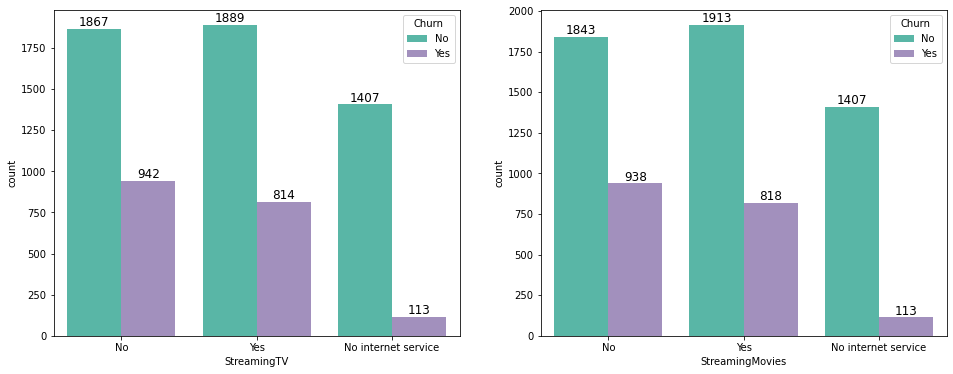

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
ax0 = sns.countplot(df['StreamingTV'], hue=df['Churn'], palette=['#49C5B0','#A088C5'],
                  order=df['StreamingTV'].value_counts().index, ax=ax[0])
ax1 = sns.countplot(df['StreamingMovies'], hue=df['Churn'], palette=['#49C5B0','#A088C5'],
                  order=df['StreamingMovies'].value_counts().index, ax=ax[1])
for j in (ax0, ax1):
    for i in j.containers:
        j.bar_label(i, fontsize=12)

Observations:
1. More than a third of customers who didn't use streaming TV but used internet service left.
2. The difference between the number of churned customers with internet service who didn't use streaming TV and used them is small. The number of customers are nearly identical with streaming movies.

<b>Online Security, Online Backup, Device Protection, and Tech Support</b>

C:\Users\Filzahanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Filzahanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Filzahanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Filzaha

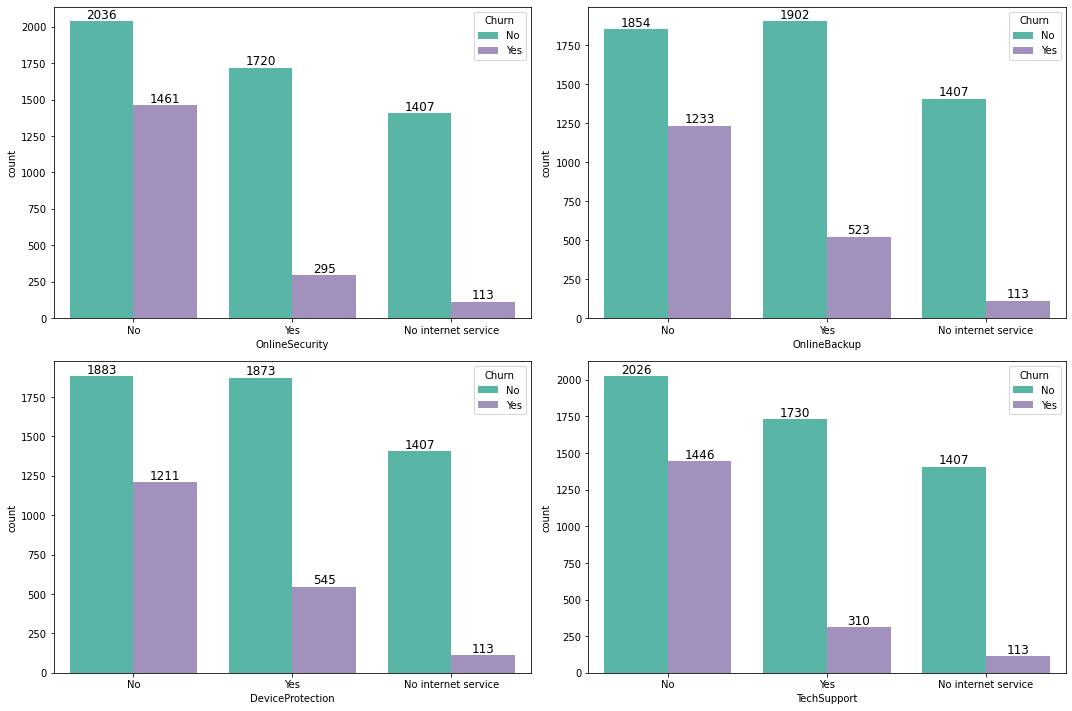

In [27]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))
ax0 = sns.countplot(df['OnlineSecurity'], hue=df['Churn'], palette=['#49C5B0','#A088C5'],
                  order=df['OnlineSecurity'].value_counts().index, ax=ax[0,0])
ax1 = sns.countplot(df['OnlineBackup'], hue=df['Churn'], palette=['#49C5B0','#A088C5'],
                  order=df['OnlineBackup'].value_counts().index, ax=ax[0,1])
ax2 = sns.countplot(df['DeviceProtection'], hue=df['Churn'], palette=['#49C5B0','#A088C5'],
                  order=df['DeviceProtection'].value_counts().index, ax=ax[1,0])
ax3 = sns.countplot(df['TechSupport'], hue=df['Churn'], palette=['#49C5B0','#A088C5'],
                  order=df['TechSupport'].value_counts().index, ax=ax[1,1])
for j in (ax0, ax1, ax2, ax3):
    for i in j.containers:
        j.bar_label(i, fontsize=12)
plt.tight_layout()

Observation:
- There are huge differences between the number of churned customers who didn't use device protection, online security, online backup, or tech support and customers who use them.

## Deep Dive Exploration

### 1. How many churned customers and existing customers have dependents and what are their maximum and minimum monthly charges?

In [28]:
dependents_churned = df.groupby(['Churn', 'Dependents']).agg(
    number_of_customers=('customerID', 'nunique'),
    max_monthly_charges=('MonthlyCharges','max'),
    min_monthly_charges=('MonthlyCharges','min')
)

In [29]:
dependents_churned

number_of_customers  max_monthly_charges  \
Churn Dependents                                             
No    No                         3390               118.65   
      Yes                        1773               118.75   
Yes   No                         1543               118.35   
      Yes                         326               114.20   

                  min_monthly_charges  
Churn Dependents                       
No    No                        18.25  
      Yes                       18.70  
Yes   No                        18.85  
      Yes                       19.00

Observations:
1. The number of customers without dependents who left is far higher than those with dependents.
2. More than half of the customers don't have dependents.
3. Maximum and minimum monthly charges don't have big differences.

### 2. How much are the averages monthly charges of churned customers and existing customers?

In [30]:
#Find the mean and variance of monthly charges and the number of customers who didn't return and existing customers.
avg_monthly_customers = df.groupby('Churn').agg(
    avg_monthly=('MonthlyCharges','mean'),
    var_monthly=('MonthlyCharges','var'),
    number_of_customers=('customerID','nunique'))

In [31]:
avg_monthly_customers

,avg_monthly,var_monthly,number_of_customers
Churn,,,
No,61.307408,966.871469,5163
Yes,74.441332,608.414183,1869


Observation:
- The average monthly charges of churned customers is higher than the existing customers according to the table. But, we could use independent t-test to compare the means of churned customers and existing customers.

Check if the two groups have equal variances


In [32]:
ratio=avg_monthly_customers['var_monthly'][0]/avg_monthly_customers['var_monthly'][1]
ratio

1.5891665506980688

Since the ratio is less than 4, they have equal variances. Conduct an independent t-test. <br>
H0: The averages monthly charges of churned customers and existing customers are equal <br>
H1: The average monthly charges of churned customers is different from the existing customers

In [33]:
stat, pvalue = st.ttest_ind(df['MonthlyCharges'][df['Churn'] == 'Yes'],
            df['MonthlyCharges'][df['Churn'] == 'No'])
print('stat:', f'{stat:.10f}', '\np value (exponential):', pvalue, '\np value (float):', f'{pvalue:.60f}')

stat: 16.4795931311 
p value (exponential): 6.760843117980302e-60 
p value (float): 0.000000000000000000000000000000000000000000000000000000000007


Because the p value is less than alpha (0.05), we reject the null hypothesis. We can say that the average monthly charges of churned customers is different from the existing customers. The average monthly charges of churned customers is higher than the existing customers.

### 3. How many churned and existing customers have partners and what are their maximum total charges?

In [34]:
partner_churn = df.groupby(['Churn', 'Partner']).agg( 
    number_of_customers=('customerID','count'),
    max_total=('TotalCharges','max')
)
partner_churn

number_of_customers  max_total
Churn Partner                                
No    No                      2439    8547.15
      Yes                     2724    8672.45
Yes   No                      1200    8127.60
      Yes                      669    8684.80

Observations:
1. Customers without partners churned more than customers with partners.
2. The maximum total charges of customers with partner are a little higher than customers without partners.